<a href="https://colab.research.google.com/github/Raeiss/Assignment-ML-Besher/blob/main/Attack_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
#Data Visualization
#Feature Selection
#Binary Classification
#Models that used:Long Short-Term Memory Classifier (Binary Classification)

In [2]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib

In [7]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 22})

import seaborn as sns

import joblib
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS # for feature selection 

# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# representation of model layers
from keras.utils.vis_utils import plot_model


In [43]:
train= '../content/KDDTrain+.txt'
test= '../content/KDDTest+.txt'
test21 = '../content/KDDTest-21.txt'

In [9]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flag=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_type=['tcp','udp','icmp']

service=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']


multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}                  

In [44]:
train_data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)


In [45]:
test_21 = pd.read_csv(test21, names= feature)

In [46]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [47]:
# remove attribute 'difficulty_level'
train_data.drop(['difficulty'],axis=1,inplace=True)
train_data.shape

(125973, 42)

In [49]:
#Data Type Checking and Statistical Reports
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [50]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [51]:
# number of attack labels 
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [52]:
#Univariate Analysis
def bar_graph(feature):
  train_data[feature].value_counts().plot(kind="bar")

In [53]:
# number of attack labels 
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

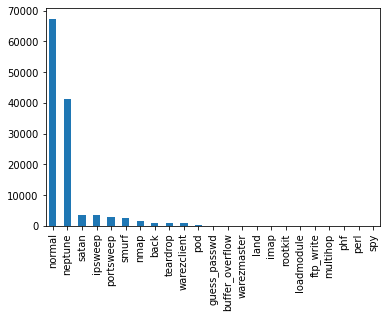

In [54]:
bar_graph('label')

In [ ]:
#Within the data set exists 4 different classes of attacks:

#Denial of Service (DoS)
#Probe
#User to Root(U2R)
#Remote to Local (R2L)

In [55]:
 #changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [56]:
change_label(train_data)

In [57]:
# distribution of attack classes
train_data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

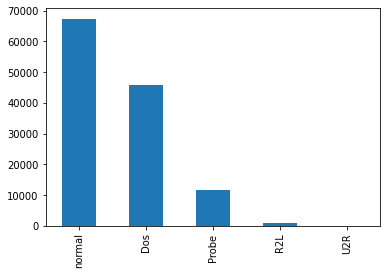

In [58]:
bar_graph('label')

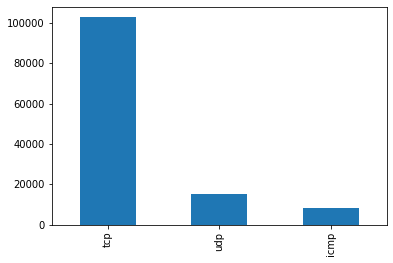

In [60]:
#Protocol used in the connection
bar_graph('protocol_type')

In [61]:
#Destination network service used
services_frequency = train_data['service'].value_counts()
subsetServices= list(services_frequency[:30].index)
services_frequency

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

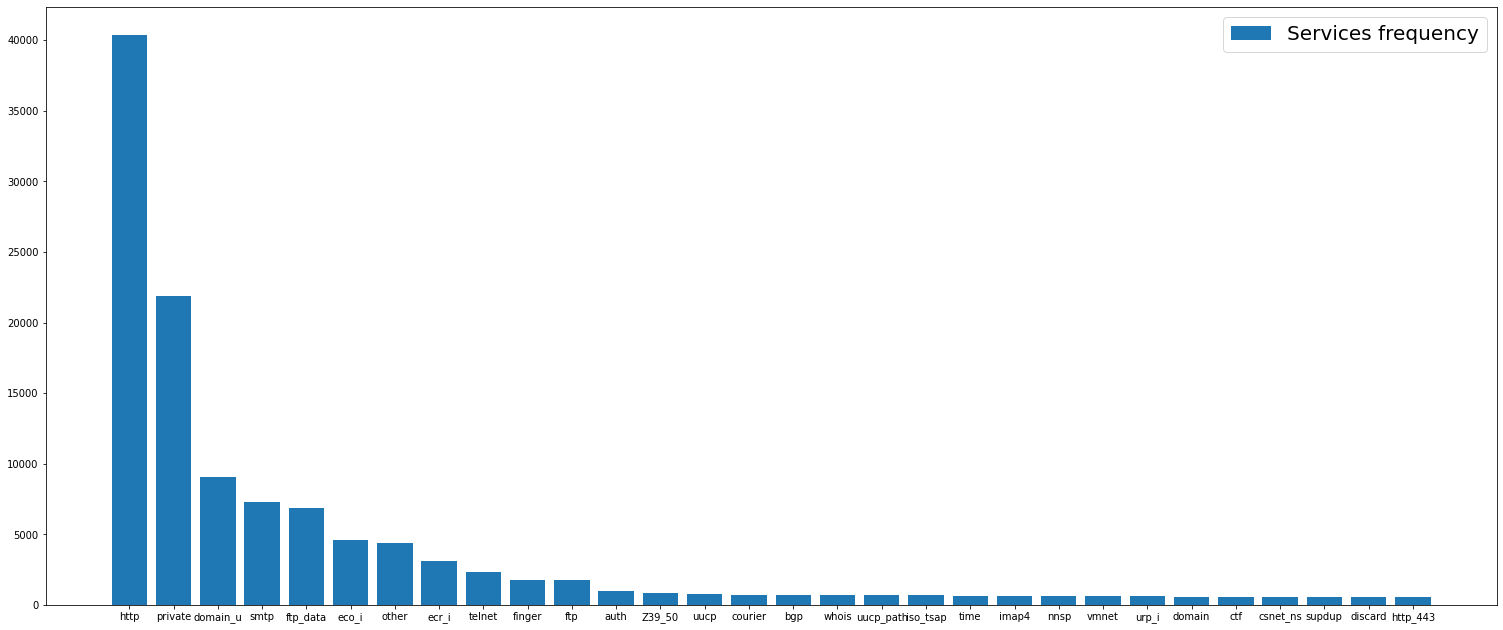

In [63]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(26,11)) # set the size that you'd like (width, height)
plt.bar(subsetServices, services_frequency[:30], label = 'Services frequency')
ax.legend(fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


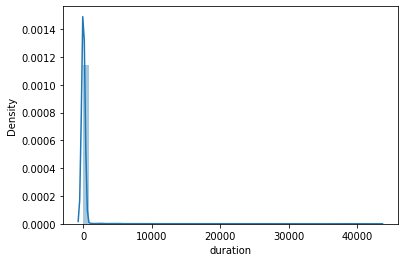

In [64]:
#Length of time during the connection
import seaborn as sns
df = train_data['duration']
df = pd.DataFrame(df)
data_feature = df.columns

for feature in data_feature:
    p = sns.distplot(a = df[feature])
    plt.show()

In [65]:
df['binned']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000])
df.head()

,duration,binned
0,0,"(-0.1, 0.0]"
1,0,"(-0.1, 0.0]"
2,0,"(-0.1, 0.0]"
3,0,"(-0.1, 0.0]"
4,0,"(-0.1, 0.0]"


In [66]:
df['duration_bin']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000], labels=["0", " (0, 10000]", "(10000, 20000]","(20000, 30000]", "(30000, 40000]"])
df

,duration,binned,duration_bin
0,0,"(-0.1, 0.0]",0
1,0,"(-0.1, 0.0]",0
2,0,"(-0.1, 0.0]",0
3,0,"(-0.1, 0.0]",0
4,0,"(-0.1, 0.0]",0
...,...,...,...
125968,0,"(-0.1, 0.0]",0
125969,8,"(0.0, 10000.0]","(0, 10000]"
125970,0,"(-0.1, 0.0]",0
125971,0,"(-0.1, 0.0]",0


In [67]:
duration_frequency = df['duration_bin'].value_counts()
#subsetServices= list(duration_frequency[:].index)
duration_frequency

0                 115955
 (0, 10000]         8804
(10000, 20000]       585
(30000, 40000]       281
(20000, 30000]       223
Name: duration_bin, dtype: int64

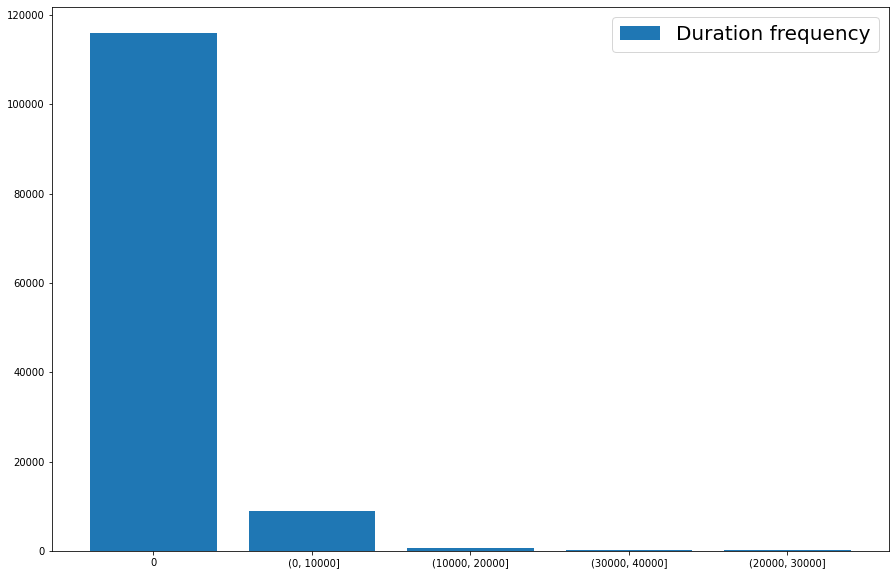

In [68]:
f, ax = plt.subplots(figsize=(15,10)) # set the size that you'd like (width, height)
plt.bar(duration_frequency.index, duration_frequency, label = 'Duration frequency')
ax.legend(fontsize = 20)

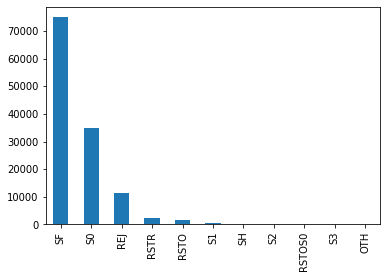

In [69]:
#flag
bar_graph('flag')

In [77]:
#Bivariate Analysis
#Protocol, Attack Types
df= pd.DataFrame(columns=['protocol', 'Attack_class', 'Number of sample in Dataset'])

In [78]:
protocols = pd.Series(train_data['protocol_type']).unique()
Label = pd.Series(train_data['label']).unique() 
Label= np.delete(Label, np.where(Label == 'normal'))

In [79]:
for pro in protocols:
  for lab in Label:
    i = len(train_data.loc[(train_data['protocol_type']== pro) & (train_data['label']==lab)])
    if (i != 0):
      df= df.append({'protocol': pro, 'Attack_class': lab, 'Number of sample in Dataset': i}, ignore_index=True)

In [80]:
df.sort_values(by=['Number of sample in Dataset'], ascending=False, ignore_index=True)

,protocol,Attack_class,Number of sample in Dataset
0,tcp,Dos,42188
1,tcp,Probe,5857
2,icmp,Probe,4135
3,icmp,Dos,2847
4,udp,Probe,1664
5,tcp,R2L,995
6,udp,Dos,892
7,tcp,U2R,49
8,udp,U2R,3


In [81]:
#Service, Attack Types
df_service= pd.DataFrame(columns=['service', 'Attack_class', 'number of sample in Dataset'])

In [82]:
services = list(services_frequency.index)
Label = pd.Series(train_data['label']).unique() 
Label= np.delete(Label, np.where(Label == 'normal'))

In [83]:
for ser in services:
  for lab in Label:
    i = len(train_data.loc[(train_data['service']== ser) & (train_data['label']==lab)])
    if (i != 0):
      df_service= df_service.append({'service': ser, 'Attack_class': lab, 'number of sample in Dataset': i}, ignore_index=True)

In [84]:
df_service.sort_values(by=['number of sample in Dataset'], ascending=False)

,service,Attack_class,number of sample in Dataset
3,private,Dos,15971
4,private,Probe,4900
12,eco_i,Probe,4089
17,ecr_i,Dos,2844
0,http,Dos,2255
...,...,...,...
90,login,R2L,2
128,http_8001,Probe,2
129,aol,Probe,2
114,IRC,Probe,1


In [85]:
#Protocol, Services
SP= pd.crosstab(train_data.service,train_data['protocol_type'],margins=True).T.style.background_gradient(cmap='summer_r')
SP

service,IRC,X11,Z39_50,aol,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,harvest,hostnames,http,http_2784,http_443,http_8001,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,All
protocol_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
icmp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4586,3077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,8,0,10,602,0,0,0,0,8291
tcp,187,73,862,2,955,710,734,545,563,521,538,569,0,434,0,0,485,474,1767,1754,6860,518,2,460,40338,1,530,2,647,687,433,299,410,475,429,439,451,405,347,362,360,630,296,0,1871,5,78,264,69,18562,0,78,86,65,7313,245,311,381,544,477,2353,0,0,654,0,0,780,689,617,693,102689
udp,0,0,0,0,0,0,0,0,0,0,0,0,9043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,2488,0,0,0,0,3291,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,14993
All,187,73,862,2,955,710,734,545,563,521,538,569,9043,434,4586,3077,485,474,1767,1754,6860,518,2,460,40338,1,530,2,647,687,433,299,410,475,429,439,451,405,347,362,360,630,296,168,4359,5,78,264,69,21853,8,78,86,65,7313,245,311,381,544,477,2353,3,8,654,10,602,780,689,617,693,125973


In [86]:
#Multivariate Analysis
#Protocol Type, Services, Label
df= pd.DataFrame(columns=['protocol', 'service', 'label', 'number of sample in Dataset'])

In [87]:
services = list(services_frequency.index)
protocols = pd.Series(train_data['protocol_type']).unique()
Label = pd.Series(train_data['label']).unique() 

for ser in services:
  for pro in protocols:
    for lab in Label:
      i = len(train_data.loc[(train_data['service']== ser) & (train_data['protocol_type']== pro) & (train_data['label']==lab)])
      if (i != 0):
        df= df.append({'protocol': pro, 'service': ser, 'label': lab, 'number of sample in Dataset': i}, ignore_index=True)

In [88]:
df.sort_values(by=['number of sample in Dataset'], ascending=False)

,protocol,service,label,number of sample in Dataset
0,tcp,http,normal,38049
5,tcp,private,Dos,15079
10,udp,domain_u,normal,9034
12,tcp,smtp,normal,7029
15,tcp,ftp_data,normal,4984
...,...,...,...,...
111,tcp,login,R2L,2
159,tcp,http_8001,Probe,2
160,tcp,aol,Probe,2
138,tcp,IRC,Probe,1


In [89]:
#Data Prepration
#For Binary and Multi-class Classification
#Binary Classification
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [96]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(train_data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [97]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = train_data.copy()
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal


In [98]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,1
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,1
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0


In [99]:
# one-hot-encoding attack label
#numeric_bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data = pd.get_dummies(train_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="") 
#bin_data['label'] = bin_label
bin_data['intrusion'] =enc_label

bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


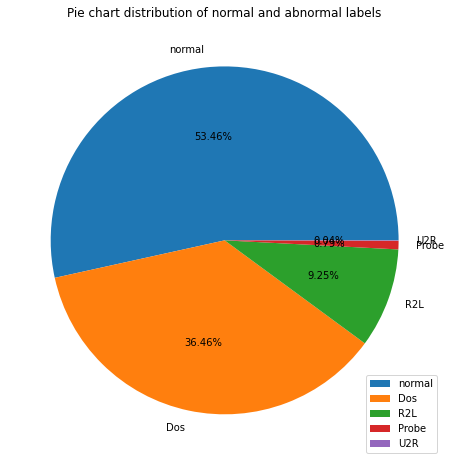

In [100]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [101]:
#bin_data_train is dataset that is ready for modeling ... X=bin_data_train[:,:122] / y=bin_data_train[:,:-1]
bin_data_train = bin_data.copy()
bin_data_train.drop(labels= [ 'label'], axis=1, inplace=True)
bin_data_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [102]:
# this data set is include just numeric features with multi labels 
#created for feature selection
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_col = train_data.select_dtypes(include='number').columns
numeric_bin_data = train_data[numeric_col]
numeric_bin_data['intrusion'] = bin_data['intrusion']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
numeric_bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,8,105,145,0,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0,2231,384,0,0,0,0,0,1,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0,0,0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


In [104]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.label)
multi_label

,label
0,normal
1,normal
2,Dos
3,normal
4,normal
...,...
125968,Dos
125969,normal
125970,normal
125971,Dos


In [105]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#y_mul = multi_data['intrusion']
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,4
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,4
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,4
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,4
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0


In [106]:
# one-hot-encoding attack label

multi_data = pd.get_dummies(multi_data,columns=['protocol_type','service','flag','label'],prefix="",prefix_sep="")  
multi_data['label'] = multi_label
multi_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,S2,S3,SF,SH,Dos,Probe,R2L,U2R,normal,label
0,0,491,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
1,0,146,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
4,0,199,420,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos


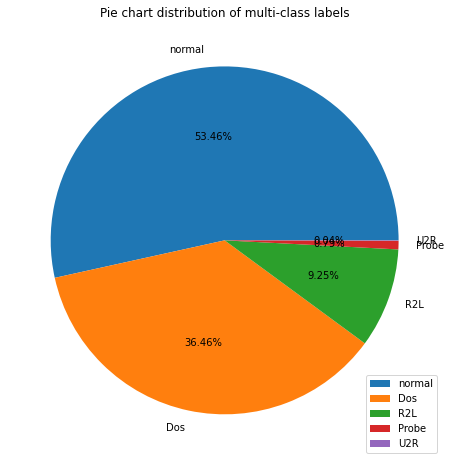

In [107]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.show()

In [108]:
# multi_data_train is dataset that is ready for modeling ... X=bin_data_train[:,:122] / y=bin_data_train[:,:-5]
multi_data_train = multi_data.copy()
multi_data_train.drop(labels= [ 'label', 'intrusion' ], axis=1, inplace=True)
multi_data_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,S1,S2,S3,SF,SH,Dos,Probe,R2L,U2R,normal
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [109]:
# this data set is include just numeric features with multi labels 
#created for feature selection
numeric_multi_data = train_data[numeric_col]
numeric_multi_data['label'] = multi_label
numeric_multi_data = pd.get_dummies(numeric_multi_data,columns=['label'],prefix="",prefix_sep="")
numeric_multi_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Dos,Probe,R2L,U2R,normal
0,0,491,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0.04,0.03,0.01,0.00,0.01,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0.00,0.72,0.00,0.01,0.00,0,0,0,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0


In [110]:
#Feature Selection
#we do this because we prefer that train models with significant features and get reliable model to classify test set
#num_dataset_bin is just include numeric features with binary labels
num_dataset_bin = numeric_bin_data.copy()
y_train_num_bin= num_dataset_bin[['intrusion']]
X_train_num_bin= num_dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_num_bin.shape,'\ny_train has shape:',y_train_num_bin.shape)

X_train has shape: (125973, 38) 
y_train has shape: (125973, 1)


In [111]:
#dataset_bin is include hole features (with encoded non numeric features like services, protocol and flag) with binary labels
dataset_bin = bin_data_train.copy()
y_train_bin= dataset_bin[['intrusion']]
X_train_bin= dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_bin.shape,'\ny_train has shape:',y_train_bin.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973, 1)


In [112]:
#num_dataset_multi is just include numeric features with multi-class labels
num_dataset_multi = numeric_multi_data.copy()
y_train_num_multi= num_dataset_multi.loc[:, 'Dos':]
X_train_num_multi= num_dataset_multi.loc[:, :'dst_host_srv_rerror_rate']

print('X_train has shape:',X_train_num_multi.shape,'\ny_train has shape:',y_train_num_multi.shape)

X_train has shape: (125973, 38) 
y_train has shape: (125973, 5)


In [113]:
#dataset_multi is include hole features (with encoded non numeric features like services, protocol and flag) with multi-class labels
dataset_multi = multi_data_train.copy()
y_train_multi= dataset_multi.loc[:, 'Dos':]
X_train_multi= dataset_multi.loc[:, :'SH']

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973, 5)


In [114]:
##Feature Importance
#pearson corrolation for binary class dataset
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr= numeric_bin_data.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [115]:
highest_corr_columns= highest_corr.index

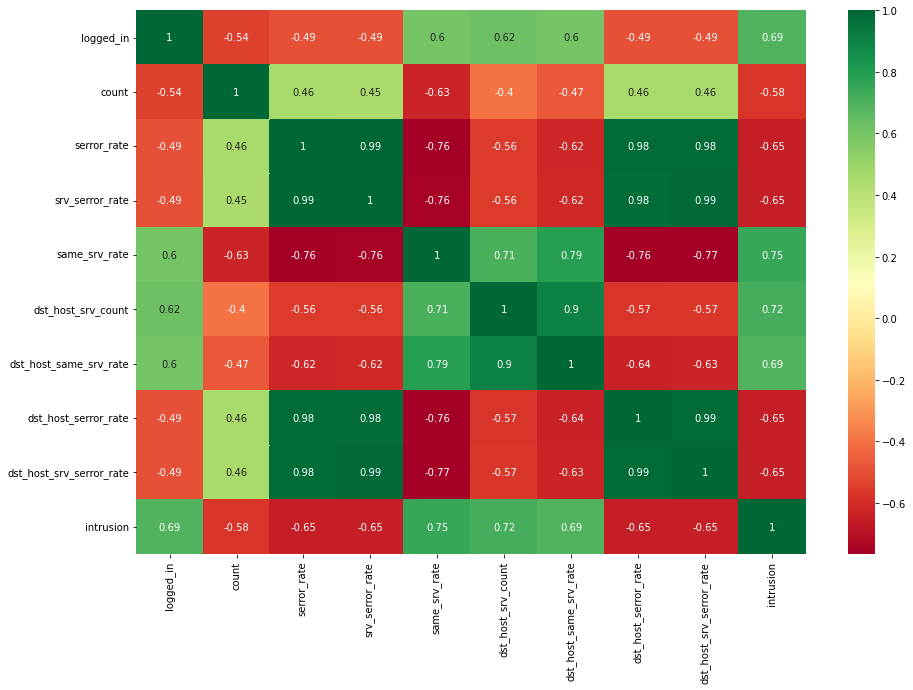

In [116]:
plt.figure(figsize=(15,10))
g=sns.heatmap(bin_data[highest_corr.index].corr(),annot=True,cmap="RdYlGn")

In [117]:
# then joining encoded, one-hot-encoded, and original attack label attribute
pearson_bin_dataset = numeric_bin_data[highest_corr_columns]
pearson_bin_dataset

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,intrusion
0,0,2,0.0,0.0,1.00,25,0.17,0.00,0.00,1
1,0,13,0.0,0.0,0.08,1,0.00,0.00,0.00,1
2,0,123,1.0,1.0,0.05,26,0.10,1.00,1.00,0
3,1,5,0.2,0.2,1.00,255,1.00,0.03,0.01,1
4,1,30,0.0,0.0,1.00,255,1.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
125968,0,184,1.0,1.0,0.14,25,0.10,1.00,1.00,0
125969,0,2,0.0,0.0,1.00,244,0.96,0.00,0.00,1
125970,1,1,0.0,0.0,1.00,30,0.12,0.72,0.00,1
125971,0,144,1.0,1.0,0.06,8,0.03,1.00,1.00,0


In [118]:
#pearson corrolation for multi-class dataset
#feature selection from numeric_multi_data
#pearson_multi_dataset is multi-class dataset based on pearson corrolation between numeric features and multi-class ( Types of Attacks)
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi_data.corr()
corr_y = abs(corr[y_train_num_multi.columns])
highest_corr = corr_y[corr_y >0.5]
highest_corr

,Dos,Probe,R2L,U2R,normal
duration,NaN,NaN,NaN,NaN,NaN
src_bytes,NaN,NaN,NaN,NaN,NaN
dst_bytes,NaN,NaN,NaN,NaN,NaN
land,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN
hot,NaN,NaN,NaN,NaN,NaN
num_failed_logins,NaN,NaN,NaN,NaN,NaN
logged_in,0.580713,NaN,NaN,NaN,0.690171
num_compromised,NaN,NaN,NaN,NaN,NaN


In [119]:
Dos_features= highest_corr[highest_corr.Dos.notnull()].index
Probe_features= highest_corr[highest_corr.Probe.notnull()].index
R2L_features= highest_corr[highest_corr.R2L.notnull()].index
U2R_features= highest_corr[highest_corr.U2R.notnull()].index
normal_features= highest_corr[highest_corr.normal.notnull()].index

In [120]:
Dos_features.intersection(Probe_features)

Index([], dtype='object')

In [121]:
pearson_multi_features = list(set(Dos_features.union(normal_features).union(Probe_features).union(R2L_features).union(U2R_features)))
for lab in y_train_num_multi.columns:
  pearson_multi_features.remove(lab)
pearson_multi_features

['dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'dst_host_serror_rate',
 'dst_host_same_srv_rate',
 'same_srv_rate',
 'srv_serror_rate',
 'dst_host_same_src_port_rate',
 'serror_rate',
 'dst_host_diff_srv_rate',
 'count',
 'logged_in']

In [122]:
# then joining encoded, one-hot-encoded, and original attack label attribute
pearson_multi_dataset = numeric_multi_data[pearson_multi_features]
pearson_multi_dataset

,dst_host_srv_count,dst_host_srv_serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,same_srv_rate,srv_serror_rate,dst_host_same_src_port_rate,serror_rate,dst_host_diff_srv_rate,count,logged_in
0,25,0.00,0.00,0.17,1.00,0.0,0.17,0.0,0.03,2,0
1,1,0.00,0.00,0.00,0.08,0.0,0.88,0.0,0.60,13,0
2,26,1.00,1.00,0.10,0.05,1.0,0.00,1.0,0.05,123,0
3,255,0.01,0.03,1.00,1.00,0.2,0.03,0.2,0.00,5,1
4,255,0.00,0.00,1.00,1.00,0.0,0.00,0.0,0.00,30,1
...,...,...,...,...,...,...,...,...,...,...,...
125968,25,1.00,1.00,0.10,0.14,1.0,0.00,1.0,0.06,184,0
125969,244,0.00,0.00,0.96,1.00,0.0,0.01,0.0,0.01,2,0
125970,30,0.00,0.72,0.12,1.00,0.0,0.00,0.0,0.06,1,1
125971,8,1.00,1.00,0.03,0.06,1.0,0.00,1.0,0.05,144,0


In [123]:
pearson_multi_dataset = pearson_multi_dataset.join(y_train_num_multi)
pearson_multi_dataset

,dst_host_srv_count,dst_host_srv_serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,same_srv_rate,srv_serror_rate,dst_host_same_src_port_rate,serror_rate,dst_host_diff_srv_rate,count,logged_in,Dos,Probe,R2L,U2R,normal
0,25,0.00,0.00,0.17,1.00,0.0,0.17,0.0,0.03,2,0,0,0,0,0,1
1,1,0.00,0.00,0.00,0.08,0.0,0.88,0.0,0.60,13,0,0,0,0,0,1
2,26,1.00,1.00,0.10,0.05,1.0,0.00,1.0,0.05,123,0,1,0,0,0,0
3,255,0.01,0.03,1.00,1.00,0.2,0.03,0.2,0.00,5,1,0,0,0,0,1
4,255,0.00,0.00,1.00,1.00,0.0,0.00,0.0,0.00,30,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,25,1.00,1.00,0.10,0.14,1.0,0.00,1.0,0.06,184,0,1,0,0,0,0
125969,244,0.00,0.00,0.96,1.00,0.0,0.01,0.0,0.01,2,0,0,0,0,0,1
125970,30,0.00,0.72,0.12,1.00,0.0,0.00,0.0,0.06,1,1,0,0,0,0,1
125971,8,1.00,1.00,0.03,0.06,1.0,0.00,1.0,0.05,144,0,1,0,0,0,0


In [125]:
#Chi Square
#used for feature selection (binary classification)
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#feature selection of all features (numeric and categorical features)
chi_scores = chi2(X_train_bin,y_train_bin)
chi_scores

(array([7.08280969e+06, 3.34032490e+09, 1.74609581e+09, 6.51239512e+00,
        3.28272717e+03, 1.81710838e+00, 4.87618999e+02, 2.97369498e+00,
        3.62591460e+04, 2.68943252e+04, 5.17680356e+01, 1.17303524e+02,
        3.25504830e+04, 1.05355586e+03, 1.34709608e+01, 4.09027580e+02,
                   nan, 8.70617585e-01, 1.92525066e+02, 6.52574244e+06,
        1.42326958e+01, 3.73654160e+04, 3.74519039e+04, 6.92353165e+03,
        6.99752801e+03, 2.08265018e+04, 2.69428137e+03, 1.24533866e+03,
        9.57432784e+05, 6.96870490e+06, 2.34477802e+04, 3.19789138e+03,
        6.92743399e+02, 1.90567199e+02, 3.72260458e+04, 3.85444066e+04,
        6.35482480e+03, 6.86709925e+03, 4.72870818e+03, 6.57169092e+01,
        5.23482354e+03, 1.59085746e+02, 4.30897575e+01, 9.90101757e+02,
        2.29721985e+00, 3.17181626e+02, 8.15513048e+02, 8.43079686e+02,
        6.25992410e+02, 6.46667389e+02, 5.98425772e+02, 6.17952141e+02,
        5.00464631e+02, 7.83935970e+03, 4.98496708e+02, 3.348288

In [126]:
p_values = pd.Series(chi_scores[1],index = X_train_bin.columns)

p_values.sort_values(ascending = False , inplace = True)

In [127]:
#select 20 best features
p_values = p_values[:20]

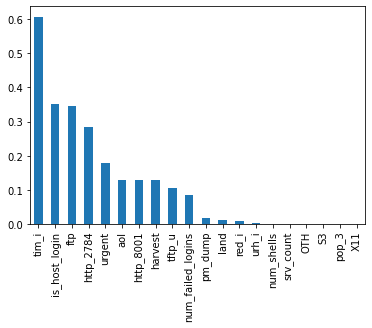

In [128]:
p_values.plot.bar()

In [129]:
#feature selection of numeric features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_num_bin,y_train_num_bin)

In [130]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_num_bin.columns)

In [131]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,duration,7.082810e+06
1,src_bytes,3.340325e+09
2,dst_bytes,1.746096e+09
3,land,6.512395e+00
4,wrong_fragment,3.282727e+03
5,urgent,1.817108e+00
6,hot,4.876190e+02
7,num_failed_logins,2.973695e+00
8,logged_in,3.625915e+04
9,num_compromised,2.689433e+04


In [132]:
data_chi2_10best = pd.DataFrame(featureScores.nlargest(10,'Score'))  #print 10 best features
data_chi2_10best

,Specs,Score
1,src_bytes,3.340325e+09
2,dst_bytes,1.746096e+09
0,duration,7.082810e+06
29,dst_host_srv_count,6.968705e+06
19,count,6.525742e+06
28,dst_host_count,9.574328e+05
35,dst_host_srv_serror_rate,3.854441e+04
22,srv_serror_rate,3.745190e+04
21,serror_rate,3.736542e+04
34,dst_host_serror_rate,3.722605e+04


In [133]:
data_chi2_10best = list(data_chi2_10best['Specs'])

In [134]:
Chi2_dataset = X_train_num_bin[data_chi2_10best]
Chi2_dataset

,src_bytes,dst_bytes,duration,dst_host_srv_count,count,dst_host_count,dst_host_srv_serror_rate,srv_serror_rate,serror_rate,dst_host_serror_rate
0,491,0,0,25,2,150,0.00,0.0,0.0,0.00
1,146,0,0,1,13,255,0.00,0.0,0.0,0.00
2,0,0,0,26,123,255,1.00,1.0,1.0,1.00
3,232,8153,0,255,5,30,0.01,0.2,0.2,0.03
4,199,420,0,255,30,255,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,25,184,255,1.00,1.0,1.0,1.00
125969,105,145,8,244,2,255,0.00,0.0,0.0,0.00
125970,2231,384,0,30,1,255,0.00,0.0,0.0,0.72
125971,0,0,0,8,144,255,1.00,1.0,1.0,1.00


In [135]:
#Tree Based Classifiers
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_multi,y_train_multi)

ExtraTreesClassifier()

In [136]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[2.85913446e-03 2.32969180e-02 6.06655480e-03 3.72362230e-05
 9.71497556e-03 2.19977866e-05 5.62956653e-03 2.20322498e-04
 4.63267139e-02 5.10211013e-03 2.42467255e-04 4.63354066e-05
 3.68878644e-04 1.45737413e-04 5.36408503e-05 8.40795112e-05
 0.00000000e+00 1.33957697e-10 1.05509353e-03 3.20375313e-02
 1.31357322e-02 4.85004254e-02 4.42151732e-02 1.44599562e-02
 1.29833644e-02 1.04118891e-01 1.32043002e-02 8.93306823e-03
 2.04096298e-02 3.80871563e-02 4.21899556e-02 3.02871503e-02
 3.06440940e-02 7.54612351e-03 5.23682164e-02 4.22002999e-02
 2.08445798e-02 1.25849322e-02 2.27805322e-02 1.14245439e-02
 1.10387367e-02 6.04663085e-04 7.40464975e-05 2.11316416e-05
 0.00000000e+00 1.50440971e-04 8.01422971e-06 8.27404471e-05
 2.00288833e-06 1.11703396e-05 1.72584661e-05 1.24433177e-05
 4.83569537e-05 9.38452823e-03 1.47620423e-05 2.95773814e-02
 1.78060418e-02 4.60664770e-06 1.60463681e-06 2.51084098e-04
 9.16052832e-04 3.16257409e-03 1.05338093e-04 5.48394207e-07
 4.29602681e-07 1.789173

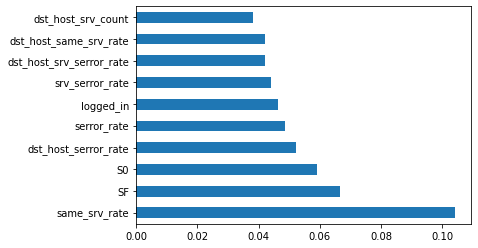

In [137]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train_multi.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [138]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_num_multi,y_train_num_multi)

ExtraTreesClassifier()

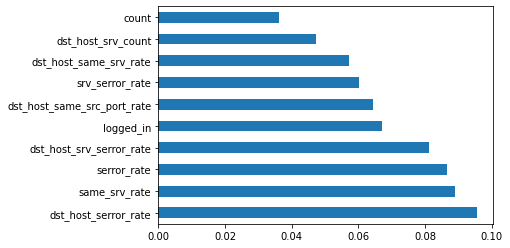

In [139]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train_num_multi.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [140]:
#Xgboost
import xgboost
import matplotlib.pyplot as plt

model = xgboost.XGBClassifier()
model.fit(X_train_bin,y_train_bin)
print(model.feature_importances_) 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1.23300208e-02 2.31085449e-01 8.90181437e-02 6.66709966e-04
 3.12242797e-03 0.00000000e+00 2.48558018e-02 2.00511701e-03
 1.28182853e-02 1.58693381e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.91620025e-03 4.13490124e-02
 1.52267767e-02 0.00000000e+00 1.43733690e-03 0.00000000e+00
 0.00000000e+00 3.79242795e-03 3.24621648e-02 0.00000000e+00
 4.21092845e-03 2.24288236e-02 3.30583155e-02 5.80613967e-03
 2.48216745e-02 4.15033661e-03 6.56592706e-03 1.52008655e-02
 5.51805971e-03 2.49715615e-03 9.44541115e-03 1.09861596e-02
 1.59244775e-03 9.26092034e-04 1.21893187e-03 0.00000000e+00
 0.00000000e+00 8.22587113e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.14988731e-03 0.00000000e+00 2.47341068e-03
 1.98815778e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.12674158e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.125500

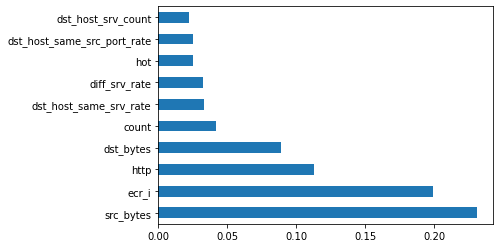

<Figure size 576x432 with 0 Axes>

In [141]:
# plot the graph of feature importances for better visualization 
#feature selection of numeric dataser

feat_imp = pd.Series(model.feature_importances_, index=X_train_bin.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

In [142]:
model = xgboost.XGBClassifier()
model.fit(X_train_num_bin,y_train_num_bin)
print(model.feature_importances_) 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.01528803 0.30894575 0.09543632 0.         0.01647749 0.
 0.04316606 0.01038139 0.0045208  0.02576034 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00384723 0.07670595 0.09900998 0.0025553  0.00260526 0.00640187
 0.0030654  0.0007884  0.05099013 0.00357365 0.00171655 0.05962712
 0.04618844 0.00882657 0.05441181 0.00855961 0.01134218 0.00478484
 0.00896286 0.02606066]


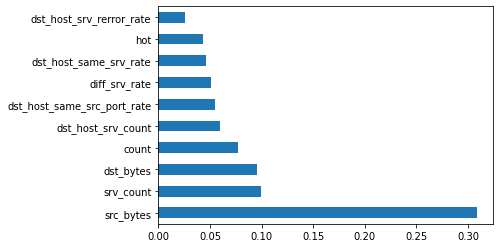

<Figure size 576x432 with 0 Axes>

In [143]:
# plot the graph of feature importances for better visualization 
#feature selection of hole dataset

feat_imp = pd.Series(model.feature_importances_, index=X_train_num_bin.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

In [145]:
#Data Standardization
#X for data
#y_bin for binary classification label
#y_multi for multi-class classification label
# selecting numeric attributes columns from data
numeric_col = train_data.select_dtypes(include='number').columns

In [146]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [147]:
# data before normalization
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [148]:
# calling the normalization() function
data = standardization(train_data.copy(),numeric_col)

In [149]:
# data after normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [150]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [151]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [152]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [153]:
Normalized_dataset = pd.concat([categorical, data],axis=1)
Normalized_dataset.drop(labels=cat_col, axis=1, inplace=True)

In [154]:
#Normalized_dataset = pd.get_dummies(Normalized_dataset, columns=Normalized_dataset['label'])
#Normalized_dataset
X = Normalized_dataset.loc[:,:'dst_host_srv_rerror_rate']
y_bin = numeric_bin_data['intrusion']

In [155]:
#multi_data.loc[multi_data['label']=='normal','intrusion']

In [156]:
y_multi = multi_data['label']

In [157]:
from sklearn.preprocessing import LabelBinarizer

y_multi = LabelBinarizer().fit_transform(y_multi)

In [158]:
y_multi

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [170]:
# splitting the dataset 75% for training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x,y_bin, test_size=0.25, random_state=42)

In [171]:
y_train = np.array(y_train)

In [172]:
x_train = x_train.values

In [173]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))

In [174]:
x_train.shape

(94479, 1, 122)

In [175]:
lst = Sequential()
# input layer and LSTM layer with 50 neurons
lst.add(LSTM(50,input_dim=122))

# outpute layer with sigmoid activation
lst.add(Dense(1,activation='sigmoid'))

In [176]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [177]:
# summary of model layers
lst.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                34600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 34,651
Trainable params: 34,651
Non-trainable params: 0
_________________________________________________________________


In [178]:
# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=20, batch_size=5000,validation_split=0.2)

Epoch 1/20
16/16 [==============================] - 6s 79ms/step - loss: 0.6098 - accuracy: 0.8486 - val_loss: 0.5201 - val_accuracy: 0.8940
Epoch 2/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4590 - accuracy: 0.9010 - val_loss: 0.3890 - val_accuracy: 0.9109
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 0.3420 - accuracy: 0.9145 - val_loss: 0.2909 - val_accuracy: 0.9347
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.2579 - accuracy: 0.9445 - val_loss: 0.2242 - val_accuracy: 0.9544
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.2021 - accuracy: 0.9593 - val_loss: 0.1810 - val_accuracy: 0.9631
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.1659 - accuracy: 0.9650 - val_loss: 0.1530 - val_accuracy: 0.9662
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.1422 - accuracy: 0.9672 - val_loss: 0.1342 - val_accuracy: 0.9677
Epoch 8/20
16

In [179]:
X_test = X_test.to_numpy()

In [180]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [181]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [182]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 4s 2ms/step - loss: 0.0681 - accuracy: 0.9752
Test results - Loss: 0.06809733808040619 - Accuracy: 97.52016067504883%


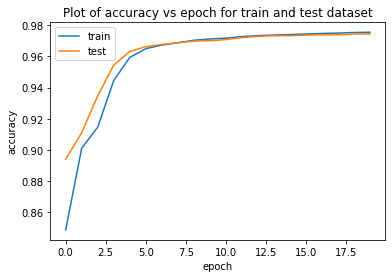

In [183]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

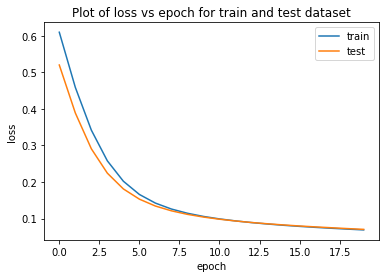

In [184]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [185]:
y_test.shape

(31494,)

In [186]:
y_pred = lst.predict(x_test)

In [187]:
y_pred.shape

(31494, 1)

In [188]:
y_pred = lst.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

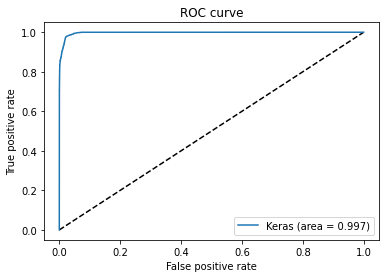

In [189]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [190]:
y_classes = (lst.predict(x_test)>0.5).astype('int32')

In [191]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.989269106951234
F1 Score -  0.977008448879861
Precision Score -  0.9650479790636813
